# Notes

This assignment is partially autograded. Problems 2 and 3 are graded manually according to the following rules:

- **1 point**: attempt was made, but solution is not correct,
- **2 points**: solution is generally correct, but is not efficient/has unreasonably low performance,
- **3 points**: solution is correct, is efficient/has reasonably high performance *(maximum grade for Problem 3)*.

Problem 1 is auto-graded. The maximum grade is **2 points** for Problem 2 and **3 points** for Problem 3.

In [15]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [16]:
plt.rcParams["figure.figsize"] = (6,6)

In [17]:
import numpy as np
import torch
from sklearn import datasets

In [18]:
STUDENT = "Gal Dahan Evyatar Shpitzer"
ASSIGNMENT = 3
TEST = False

In [19]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 6

# Gradients

### 1. Generate gradient (1 point).

For 2-dimensional tensor `tr`, calculate a gradient of $\sum\log tr_{ij}$. Note, that you're provided with dimensions and interval, and not the `tr` inself:

- `dims` is a tuple, so that `tr.size()` equals `dims`,
- `lims` is an interval, so that elements of `tr` are integeres, uniformly sampled from `[lims[0], lims[1])` interval (note, that lims[1] is **not** included).

Result must be a tensor of the same shape as `tr` (namely, `dims`), containing gradients of the following function:

$$\sum_{ij}\log tr_{ij}.$$

and generated `tr` itself.

Result **will be tested against multiple random combinations of input tensor dimensions ($10 \leq n < 100 $) and sampling interval (`lims[0]=1`, `10 <= lims[1] < 100`)**.

**Hint**: think on how you can validate the solution yourself, given that gradient can be computed manually on paper.

In [20]:
def generate_grad(dims, lims):
    """Generate gradient of `log(x)`."""
    # tr = your code goes here
    # gradient calculation
    tr = torch.randint(lims[0], lims[1], dims, requires_grad=True, dtype=torch.float)
    a = torch.log(tr).sum()
    a.backward()
    return tr.grad, tr

In [21]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, generate_grad)

### 2. Find a minimum (2 points, manually graded).

Consider the following scalar function:

$$
f(x) = ax^2 + bx + c
$$

Given the $a,b,c$, find $x$, which minimizes $f(x)$. Note this:

- $a,b,c$ are fixed, and generated in such a way, that minimum always exists ($f(x)$ is convex),
- $x$ is a scalar value, i.e. 0-dimensional tensor.

**Hint:** stop for a second to think about which tensor must contain `requires_grad` and on which scalar should `.backward()` be called.

In [22]:
def generate_coeffs():
    a = torch.rand(size=()) * 10
    b = -10 + torch.rand(size=()) * 10
    c = -10 + torch.rand(size=()) * 10
    return a, b, c

def func(x, a, b, c):
    return x.pow(2) * a + x * b + c

In [23]:
EPOCHS = 20
LR = 1e-1
STARTING_VAL = 51. # Consider choosing different starting values for x to speed-up the optimization
DELTA = 0.0001
# Initialize x, a, b, c
x = torch.tensor(STARTING_VAL, requires_grad=True)
a, b, c = generate_coeffs()


# Collect f(x) values during training for visuzalition later on
f_vals = []

for i in range(EPOCHS):
    # Your code goes here
    y = func(x,a,b,c)
    y.backward()
    f_vals.append(y.item())
    
    with torch.no_grad():
        x.sub_(LR * x.grad)
        
    x.grad.zero_()

   
    
    try:
        if f_vals[-2] - f_vals[-1] < DELTA:
            #print("this is the last value: {0} a {1} b{2} c {3} x {4} i is {5}".format(f_vals[-2] - f_vals[-1], a,b,c,x,i))
            break
    except:
        pass
    
    
    

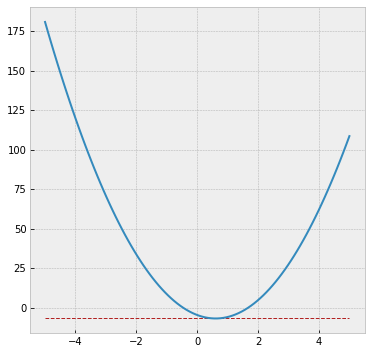

In [24]:
if f_vals:
    grid = np.linspace(-5, 5, 100)
    plt.plot(grid, np.square(grid) * a.item() + grid * b.item() + c.item())
    plt.hlines(f_vals[-1], -5, 5, "firebrick", "--", linewidth=1)

In [25]:
PROBLEM_ID = 2
GRADE = 0

if TEST:
    total_grade += GRADE

### 3. Simple neural network model (3 points, manually graded).

Construct a non-linear model for binary classification. Use logistic regression example from Week 3 lecture as a blueprint. Experiment with different number of intermediate layers and their sizes to achieve good performance.

For a reference, imagine a neural network with a single hidden layer with $N$ neurons. Then, input $X$ is first transformed as:

$$
X^{hidden}_{ik} = \sigma(X_{ij}W^{hidden}_{jk} + b^{hidden}_k),
$$
$$
\hat y_{i} = \sigma(X^{hidden}_{ij}W_{j} + b).
$$

After this, $X^{hidden}_{ik}$ can be considered as an input to the same logistic regression model we had in class. The bonus is that we performed non-linear transformation of the original coordinates and can now catch non-linear decision boundary (as is the case for the mock data below).

Note also, that $X$ has shape $(N, 2)$ (where $N$ is the number of training examples), $W^{hidden}_{jk}$ has shape of $(2, N^{hidden})$ and $b^{hidden}_k$ has shape $(N^{hidden})$. At the same time, $W$ has shape $(N^{hidden},)$ and $b$ is a scalar (the same way it was for logistic regression). This model can be considered as a logistic regression on transformed coordinates, but we learn the transformation itself.

**Validation criterion for full grade on this problem:** achieve accuracy of at least `0.94` **and** use no more than one hidden layer with no more than 6 neurons.

In [141]:
N = 6
N_LAYERS = 2
N_HIDDEN = (2,N)

In [148]:
X, y = datasets.make_moons(1000, noise=.25)

In [149]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

In [150]:
weights = []
biases = []

# any setup code you need
#np.random.seed(1)
#torch.manual_seed(1)

w_shape = [(2,N),(N,1) ]  #hidden first
b_shape = [N,1 ]  #hidden first

for i in range(N_LAYERS):
    # Initialize w and b for layer i with number of "neurons" of N_HIDDEN[i]
    w = torch.randn(w_shape[i], requires_grad=True) # <- your code goes here
    b = torch.randn(b_shape[i], requires_grad=True) # <- your code goes here
    weights.append(w)
    biases.append(b)

In [151]:
def sigmoid(a):
    """Sigmoid activation function."""

    return 1/(1 + (-a).exp())

def output(X, weights, biases):
    x_hidden = sigmoid(torch.mm(X, weights[0]) + biases[0])
    return sigmoid(torch.mm(x_hidden, weights[1]) + biases[1])

def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()

In [152]:
EPOCHS = 30000
LR = 1
DELTA = 0.00001
loss_history = []

for i in range(EPOCHS):
    y_pred = output(Xt, weights, biases)
    loss = logloss(yt, y_pred)
    loss.backward()
    
    loss_history.append(loss.item())

    with torch.no_grad():
        # update all the weights and biases
        # your code goes here
        #for w in weights:
        w.sub_(LR * w.grad)
            
        
        #for b in biases:
        b.sub_(LR * b.grad)
            

    # wipe out all gradients
    # your code goes here
    for w in weights:
        w.grad.zero_()
    
    for b in biases:    
        b.grad.zero_()
        
    if i % 20 == 0:
        print(f"Epoch {i}: loss = {loss_history[-1]}")
    
    try:
        if loss_history[-2] - loss_history[-1] < DELTA:
            break
    except:
        pass

Epoch 0: loss = 0.6552890539169312
Epoch 20: loss = 0.49578773975372314
Epoch 40: loss = 0.4351590573787689
Epoch 60: loss = 0.40448302030563354
Epoch 80: loss = 0.3864278495311737
Epoch 100: loss = 0.37468966841697693
Epoch 120: loss = 0.36652782559394836
Epoch 140: loss = 0.36057835817337036
Epoch 160: loss = 0.35608965158462524
Epoch 180: loss = 0.3526139557361603
Epoch 200: loss = 0.34986716508865356
Epoch 220: loss = 0.34766075015068054
Epoch 240: loss = 0.34586411714553833
Epoch 260: loss = 0.3443843722343445
Epoch 280: loss = 0.3431533873081207
Epoch 300: loss = 0.3421202003955841
Epoch 320: loss = 0.34124624729156494
Epoch 340: loss = 0.3405015468597412
Epoch 360: loss = 0.33986252546310425
Epoch 380: loss = 0.33931082487106323
Epoch 400: loss = 0.33883148431777954
Epoch 420: loss = 0.33841264247894287
Epoch 440: loss = 0.33804449439048767
Epoch 460: loss = 0.3377191126346588
Epoch 480: loss = 0.33743008971214294
Epoch 500: loss = 0.33717167377471924
Epoch 520: loss = 0.3369395

In [153]:
accuracy = np.sum(y == (y_pred.detach().numpy().flatten() > 0.5))/1000
print("Accuracy is %f" % accuracy)

Accuracy is 0.857000


In [71]:
y_pred

tensor([[0.5434],
        [0.9196],
        [0.5642],
        [0.1368],
        [0.0952],
        [0.6914],
        [0.1717],
        [0.8492],
        [0.0491],
        [0.5429],
        [0.2998],
        [0.1960],
        [0.4116],
        [0.1497],
        [0.6713],
        [0.1799],
        [0.4584],
        [0.6665],
        [0.6994],
        [0.6313],
        [0.9378],
        [0.4297],
        [0.4383],
        [0.1962],
        [0.2205],
        [0.1770],
        [0.2612],
        [0.8055],
        [0.6611],
        [0.2140],
        [0.5861],
        [0.7872],
        [0.9008],
        [0.5454],
        [0.3803],
        [0.2031],
        [0.6948],
        [0.8702],
        [0.7711],
        [0.7353],
        [0.9059],
        [0.7571],
        [0.4246],
        [0.2959],
        [0.3041],
        [0.6236],
        [0.3362],
        [0.4167],
        [0.2583],
        [0.6615],
        [0.8562],
        [0.5074],
        [0.6632],
        [0.6180],
        [0.2650],
        [0

ValueError: 'c' argument has 1000000 elements, which is not acceptable for use with 'x' with size 1000, 'y' with size 1000.

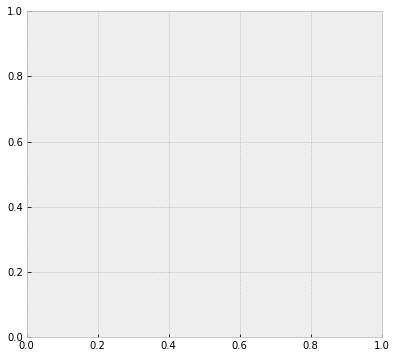

In [36]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [ ]:
PROBLEM_ID = 3
GRADE = 0

if TEST:
    total_grade += GRADE

In [ ]:
if TEST:
    print(f"{STUDENT}: {int(100 * total_grade / MAX_POINTS)}")